<a href="https://colab.research.google.com/github/carlosfab/curso_data_science_na_pratica/blob/master/modulo_02/%5BSOLU%C3%87%C3%83O%5D_PROJETO_Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeirob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

**Instruções para o Projeto**

* Você deve importar o pandas e importar a base de dados da Polícia Militar do Rio de Janeiro sobre a violência
  * O arquivo `csv` se encontra no endereço abaixo:
    * https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv
  * Este arquivo `csv` não está separado por vírgula, mas por ponto e vírgula. Por isso, deve ser importado da seguinte maneira:
    * `df = pd.read_csv("ENDEREÇO_DO_ARQUIVO_CSV", sep=";")`
  * Este é o site oficial, do Governo do Estado do Rio de Janeiro:
    * http://www.ispdados.rj.gov.br/estatistica.html
  * Um *dashboard* interativo e visual pode ser encontrado no site abaixo:
    * http://www.ispvisualizacao.rj.gov.br/index.html
  * Você está livre para apagar, alterar e acrescentar o que quiser!
  * Sem um guia, você vai sentir mais dificuldade, mas eu te garanto que se sentir fora da zona de conforto vai ser o mais importante no caminho do Data Science
  * Se você sentiu dificuldade, não se preocupe! Sexta-feira será disponibilizada a minha análise para você replicar exatamente como eu fiz.
    * Se sentir perdido é normal, mas acredite: O seu cérebro vai começar a adquirir uma capacidade nova de pensar em hipóteses, e questionar dados.
  
  
---
  

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Analisando a Violência no Rio de Janeiro

É fato que a violência atinge todas as cidades do Brasil, e vem ganhando destaque nos noticiários, cada vez mais.

Atualmente, as leis de acesso à informação e a conscientização dos órgãos públicos, vêm proporcionando a disponibilização de várias fontes de dados.

Como exemplo, o governo do Rio de Janeiro traz a iniciativa do [portal ISPDados](http://www.ispdados.rj.gov.br/). No projeto deste Módulo, faremos uma análise em cima dos indicadores estatísticos da violência no Rio, explorando algumas das variáveis fornecidas.

## Obtenção dos Dados


Os dados foram obtidos diretamento do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv).

### Importando os dados

Uma vez que o arquivo `csv` tem seus campos separados por ";", é necessário informar essa condição ao importar este.

In [0]:
# importa os pacotes necessários
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv',
                 sep=';')

## Análise Inicial dos Dados

Breve contextualização...

Descreva e execute as seguintes etapas:

* Qual o tamanho do seu DataFrame (`shape`)
* Extrair e imprimir os nomes das colunas (`columns`)
* Quais os tipos das variáveis (`dtypes`)
* Visualizar as 5 primeiras linhas (`head`)
* Identifique a porcentagem de valores ausentes das colunas


In [2]:
# verificar o tamanho do DataFrame
df.shape

(344, 56)

In [3]:
# imprimir os nomes das colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [4]:
# ver os tipos das variáveis
df.dtypes

vano                           int64
mes                            int64
hom_doloso                     int64
lesao_corp_morte              object
latrocinio                     int64
hom_por_interv_policial       object
tentat_hom                     int64
lesao_corp_dolosa              int64
estupro                       object
hom_culposo                   object
lesao_corp_culposa            object
roubo_comercio                 int64
roubo_residencia               int64
roubo_veiculo                  int64
roubo_carga                    int64
roubo_transeunte               int64
roubo_em_coletivo              int64
roubo_banco                    int64
roubo_cx_eletronico           object
roubo_celular                 object
roubo_conducao_saque          object
roubo_apos_saque              object
roubo_bicicleta               object
outros_roubos                  int64
total_roubos                   int64
furto_veiculos                 int64
furto_transeunte               int64
f

In [5]:
# ver as 5 primeiras entradas do dataset
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,,15,,162,3051,,,,350,188,1174,63,967,381,37,,,,,,158,3318,2009,1147,,,,3561,6717,,,,,133,,,,872,,,,,,,217,,,,672,1348,1174,,3
1,1991,2,732,,17,,175,3421,,,,357,171,1097,64,963,432,35,,,,,,142,3261,1850,1066,,,,3309,6225,,,,,127,,,,751,,,,,,,209,,,,749,1395,1097,,3
2,1991,3,713,,25,,216,3613,,,,443,191,1265,71,963,422,43,,,,,,131,3529,2084,1062,,,,3573,6719,,,,,80,,,,789,,,,,,,188,,,,738,1385,1265,,3
3,1991,4,634,,20,,200,3211,,,,425,199,1415,81,1186,354,36,,,,,,112,3808,2085,1195,,,,3290,6570,,,,,133,,,,787,,,,,,,140,,,,654,1540,1415,,3
4,1991,5,650,,20,,146,3051,,,,553,231,1449,82,931,335,27,,,,,,147,3755,2185,723,,,,3546,6454,,,,,163,,,,845,,,,,,,78,,,,670,1266,1449,,3


In [6]:
# ver os valores faltantes das colunas
df.isnull().sum() / df.shape[0]

vano                          0.0
mes                           0.0
hom_doloso                    0.0
lesao_corp_morte              0.0
latrocinio                    0.0
hom_por_interv_policial       0.0
tentat_hom                    0.0
lesao_corp_dolosa             0.0
estupro                       0.0
hom_culposo                   0.0
lesao_corp_culposa            0.0
roubo_comercio                0.0
roubo_residencia              0.0
roubo_veiculo                 0.0
roubo_carga                   0.0
roubo_transeunte              0.0
roubo_em_coletivo             0.0
roubo_banco                   0.0
roubo_cx_eletronico           0.0
roubo_celular                 0.0
roubo_conducao_saque          0.0
roubo_apos_saque              0.0
roubo_bicicleta               0.0
outros_roubos                 0.0
total_roubos                  0.0
furto_veiculos                0.0
furto_transeunte              0.0
furto_coletivo                0.0
furto_celular                 0.0
furto_biciclet

In [0]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

Após rodar as células acima, percebe-se que é visível que há dados ausentes. Entretanto, quando se executa `df.isnull().sum()`, aparentemente o *dataset* está completo.

Após analisar o arquivo `csv`, nota-se que os campos "ausentes" estão na verdade preenchidos com uma `string` vazia do tipo `''`.

Buscando a solução para o problema, uma das alternativas fornecidas encontradas (este link [link text](https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas/52572319#52572319)) é executar o seguinte código:

In [8]:
# importar o numpy e substituir valores ausentes
import numpy as np
df = df.replace(r'^\s*$', np.nan, regex=True)

# ver as 5 primeiras entradas após a substituição
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Um outro passo para limpar os dados adequadamente seria converter os dados que são visivelmente do tipo `int` mas estão representados pelo tipo `object`.

Trataremos desse tipo de tratamento e limpeza no Módulo sobre *Machine Learning*, porém já vá entendendo o tipo de problema que surge quando estamos lidando com *datasets* reais.

Para conferir se os valores ausentes foram contabilizados, vamos repetir a contagem desses valores.

In [9]:
df.isnull().sum() / df.shape[0]

vano                          0.000000
mes                           0.000000
hom_doloso                    0.000000
lesao_corp_morte              0.279070
latrocinio                    0.000000
hom_por_interv_policial       0.244186
tentat_hom                    0.000000
lesao_corp_dolosa             0.000000
estupro                       0.418605
hom_culposo                   0.244186
lesao_corp_culposa            0.279070
roubo_comercio                0.000000
roubo_residencia              0.000000
roubo_veiculo                 0.000000
roubo_carga                   0.000000
roubo_transeunte              0.000000
roubo_em_coletivo             0.000000
roubo_banco                   0.000000
roubo_cx_eletronico           0.418605
roubo_celular                 0.313953
roubo_conducao_saque          0.418605
roubo_apos_saque              0.418605
roubo_bicicleta               0.802326
outros_roubos                 0.000000
total_roubos                  0.000000
furto_veiculos           

## Informações Estatísticas da Violência no Rio de Janeiro

Breve contextualização...

Descreva e execute as seguintes etapas:

* Imprima o resumo estatístico do seu DataFrame (`describe`)
* Encontre as médias das seguintes variáveis (colunas):
  * `roubo_veiculo`
  * `furto_veiculos`
  * `recuperacao_veiculos`
* Calcule qual a porcentagem de carros recuperados em relação aos carros roubados + carros furtados:
  * $\frac{\text{recuperacao_veiculos}}{ \text{roubo_veiculo} + \text{furto_veiculos}}$
* Encontre os valores máximos (`max`) e mínimos (`min`) da coluna `hom_doloso`


In [10]:
# imprimir o resultado estatístico do DataFrame
df.describe()

,vano,mes,hom_doloso,latrocinio,tentat_hom,lesao_corp_dolosa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,outros_furtos,total_furtos,apreensao_drogas,recuperacao_veiculos,encontro_cadaver,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,fase
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,2004.837209,6.453488,504.555233,15.668605,318.267442,5492.799419,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,1211.223837,9428.119186,1674.671512,1518.921512,5994.328488,10433.177326,1071.930233,1772.238372,66.261628,577.691860,4734.738372,2448.697674,2.994186
std,8.289036,3.447759,113.774481,5.861427,127.606645,1514.220579,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,800.576723,4578.013053,294.852020,971.853102,1964.767779,3696.725756,643.381991,656.761843,34.464519,104.973929,3204.054864,789.689559,0.076138
min,1991.000000,1.000000,272.000000,2.000000,122.000000,2350.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,2322.000000,4691.000000,80.000000,729.000000,0.000000,334.000000,1086.000000,1097.000000,2.000000
25%,1998.000000,3.000000,413.750000,11.000000,200.000000,4067.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,811.750000,5107.750000,1430.500000,732.000000,3978.000000,6700.250000,714.500000,1276.750000,42.000000,500.000000,1557.000000,1889.750000,3.000000
50%,2005.000000,6.000000,507.000000,15.000000,318.500000,5830.500000,433.500000,125.000000,2322.000000,285.500000,2788.500000,592.000000,4.500000,1154.000000,9243.500000,1637.500000,1076.500000,6559.000000,10448.500000,979.500000,1755.000000,60.500000,590.000000,4190.000000,2322.000000,3.000000
75%,2012.000000,9.000000,577.250000,19.000000,398.250000,6582.500000,536.250000,151.250000,2778.000000,401.250000,5385.250000,784.000000,14.000000,1635.000000,11590.500000,1833.250000,2334.250000,7601.500000,13877.500000,1546.000000,2202.000000,87.000000,649.000000,6872.750000,2778.000000,3.000000
max,2019.000000,12.000000,831.000000,36.000000,645.000000,9050.000000,914.000000,300.000000,5358.000000,1329.000000,9669.000000,1628.000000,54.000000,3661.000000,23203.000000,2630.000000,5368.000000,9880.000000,18003.000000,2543.000000,3695.000000,217.000000,848.000000,13833.000000,5358.000000,3.000000


In [11]:
# ver a média da variável roubo_veiculo
mean_roubo_veiculo = df.roubo_veiculo.mean()
print(mean_roubo_veiculo)

2448.6976744186045


In [12]:
# ver a média da variável furto_veiculos
mean_furto_veiculos = df.furto_veiculos.mean()
print(mean_furto_veiculos)

1674.671511627907


In [13]:
# ver a média da variável recuperacao_veiculos
mean_recuperacao_veiculos = df.recuperacao_veiculos.mean()
print(mean_recuperacao_veiculos)

1772.2383720930231


In [14]:
# ver a porcentagem de carros recuperados em relação aos carros roubados + carros furtados
mean_recuperacao_veiculos / (mean_furto_veiculos + mean_roubo_veiculo)

0.42980346705075084

In [15]:
# valores max e min de hom_doloso
max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()

# imprimir os valores máximos e mínimos
print("Min:\t{}".format(min_hom_doloso))
print("Max:\t{}".format(max_hom_doloso))

Min:	272
Max:	831


## Visualização de Dados

Breve contextualização...

Plote e comente os seguintes gráficos:

* Histograma de `hom_doloso`
* Gráfico de linhas para a variável `roubo_em_coletivo`


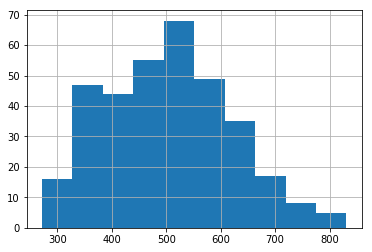

In [16]:
# plotar histograma de hom_doloso
df.hom_doloso.hist();

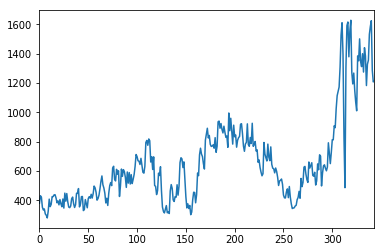

In [17]:
# plotar gráfico de linhas para roubo_em_coletivo
df.roubo_em_coletivo.plot();

## Conclusão

A principal lição aprendida aqui foi a necessidade de se atentar a cada detalhe do seu *dataset* quando se está lidando com dados reais, extraídos diretamente de sites e portais com dados abertos.

Muitas vezes, nos acostumamos a usar dados de competições ou cursos, que estão perfeitos.

Eu ressalto novamente, a etapa de aquisição, tratamento e exploração dos dados é o que mais vai consumir o tempo do seu projeto. Dedique sempre um bom tempo a esta etapa.